## CiFAR 이미지 분류 모델 구현
---
- 데이터 : CiFAR10 https://www.cs.toronto.edu/~kriz/cifar.html
- 학습방법 : 10가지 이미지 종류 분류 => 다중분류
- 이미지 : DNN(MLP), CNN 적용

In [1]:
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.cifar10 import load_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# W,b 고정하도록 seed 설정
set_random_seed(11)

## [1] 데이터 준비 및 로딩

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
print(f' x_train.shape: {x_train.shape}, y_train.shape : {y_train.shape}')
print(f' x_test.shape: {x_test.shape}, y_test.shape : {y_test.shape}')

 x_train.shape: (50000, 32, 32, 3), y_train.shape : (50000, 1)
 x_test.shape: (10000, 32, 32, 3), y_test.shape : (10000, 1)


## [2] 데이터 전처리 및 학습형태로 변환

In [5]:
# 스켈일링 => 픽셀 /255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [6]:
# Conv 레이어는 이미지의 채널 정보까지 입력
x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

In [7]:
print(f'x_train.shape : {x_train.shape}, x_test.shape : {x_test.shape}')

x_train.shape : (50000, 32, 32, 3), x_test.shape : (10000, 32, 32, 3)


In [8]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=11)

In [10]:
print(f'x_train.shape : {x_train.shape}\nx_val.shape : {x_val.shape}\nx_test.shape : {x_test.shape}')

x_train.shape : (37500, 32, 32, 3)
x_val.shape : (12500, 32, 32, 3)
x_test.shape : (10000, 32, 32, 3)


## [3] 모델 구성 및 생성

In [11]:
model=Sequential()

In [12]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(10, kernel_size=3, padding='same', input_shape=(32,32,3)))

In [13]:
# 이미지 특징 다운샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [14]:
model.add(Conv2D(10, kernel_size=3, padding='same'))

In [15]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [16]:
# 출력층 => Node : 10개(0~9), activation : softmax
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 10)        910       
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 10)                25610     
                                                                 
Total params: 26,800
Trainable params: 26,800
Non-trainable params: 0
____________________________________________________

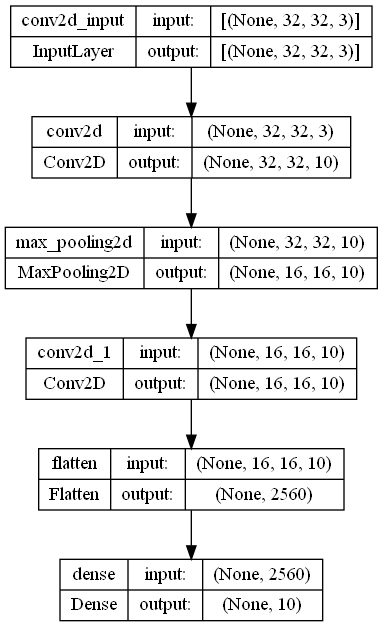

In [18]:
plot_model(model, show_shapes=True) # to_file='cnn.png' - 파일 저장

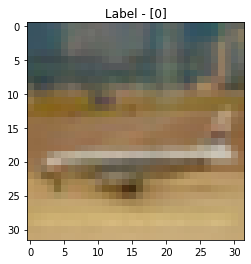

In [19]:
plt.imshow(x_val[3].reshape(32,32,3), cmap='gray')
plt.title(f'Label - {y_val[3]}')
plt.show()

## [3-2] 모델 생성

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

## [3-3] 모델 학습

In [21]:
model.fit(x_train, y_train, epochs=30) # verbose=False

Epoch 1/30
1172/1172 [==============================] - 11s 9ms/step - loss: 1.6718 - accuracy: 0.4133
Epoch 2/30
1172/1172 [==============================] - 12s 10ms/step - loss: 1.4950 - accuracy: 0.4863
Epoch 3/30
1172/1172 [==============================] - 12s 10ms/step - loss: 1.4029 - accuracy: 0.5154
Epoch 4/30
1172/1172 [==============================] - 11s 10ms/step - loss: 1.3089 - accuracy: 0.5491
Epoch 5/30
1172/1172 [==============================] - 11s 10ms/step - loss: 1.2433 - accuracy: 0.5722
Epoch 6/30
1172/1172 [==============================] - 11s 10ms/step - loss: 1.1903 - accuracy: 0.5907
Epoch 7/30
1172/1172 [==============================] - 11s 10ms/step - loss: 1.1587 - accuracy: 0.6001
Epoch 8/30
1172/1172 [==============================] - 11s 10ms/step - loss: 1.1334 - accuracy: 0.6115
Epoch 9/30
1172/1172 [==============================] - 11s 10ms/step - loss: 1.1006 - accuracy: 0.6221
Epoch 10/30
1172/1172 [==============================] - 12s 10ms

## [4] 평가
---
- evaluate 메서드
- 테스트 데이터, 테스트 라벨

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.2918 - accuracy: 0.5784


[1.2918498516082764, 0.5784000158309937]

## [5] 테스트
---
- 새로운 데이터

In [23]:
x_test[0].shape

(32, 32, 3)

In [26]:
pre_y=model.predict(x_test[0].reshape(-1, 32, 32, 3))

1/1 [==============================] - 0s 53ms/step


In [27]:
pre_y.round(2), pre_y.shape

(array([[0.  , 0.05, 0.  , 0.83, 0.  , 0.01, 0.05, 0.  , 0.06, 0.  ]],
       dtype=float32),
 (1, 10))

In [28]:
y_test[0]

array([3], dtype=uint8)